# Lektion 3 - Übung 1

Import von Python-Bibliotheken und notwendiger Code für diverse Funktionen

In [1]:
## imports
import math
import pandas as pd
from IPython.display import HTML, display


## Der folgende Code dient zur Implementierung der Funktionalität, damit Code ein- und ausgeblendet werden kann.
def toggle_code():
    toggle_code_js_html = '''
    <script>
    function code_toggle() {
        if ($('div.cell.code_cell.rendered.selected div.input').css('display')!='none'){
            $('div.cell.code_cell.rendered.selected div.input').hide();
        } else {
            $('div.cell.code_cell.rendered.selected div.input').show();
        }
    }
    </script>
    <form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Code ein-/ausblenden"></form>
    '''
    display(HTML(toggle_code_js_html))


toggle_code()

# Aufgabentext

Ein Wissenschaftler wird beauftragt, den Zusammenhang zwischen zwei Aktien X und Y zu untersuchen. Im Laufe des Jahres wurden an der Frankfurter Börse folgende Monatsendbestände der Kurse ermittelt.

|Monat    |Kurs von X (in €)|Kurs von Y (in €)|
|---      |---              |---              |
|Januar   |27,90            |43,00            |
|Februar  |28,20            |46,10            |
|März     |27,50            |43,40            |
|April    |28,30            |43,80            |
|Mai      |28,20            |47,30            |
|Juni     |28,70            |47,80            |
|Juli     |27,90            |43,20            |
|August   |27,30            |45,20            |
|September|29,10            |47,20            |
|Oktober  |29,60            |45,70            |
|November |29,50            |48,50            |
|Dezember |29,80            |50,60            |

Analysieren Sie den Zusammenhang mit Hilfe des Ihnen bekannten Instrumentariums.

# Lösung

|i                                  |$$ x_i $$|$$ y_i $$       |$$ x_i - \bar{x} $$|$$ y_i - \bar{y} $$|$$ (x_i - \bar{x})^2 $$|$$ (y_i - \bar{y})^2 $$|$$ (x_i - \bar{x})(y_i - \bar{y}) $$|
|---                                |---      |---             |---                |---                |---                    |---                    |---                                 |
|1                                  |27,90    |43,00           |-0,60              |-2,98              |0,36                   |8,90                   |1,79                                |
|2                                  |28,20    |46,10           |-0,30              |0,12               |0,09                   |0,01                   |-0,04                               |
|3                                  |27,50    |43,40           |-1,00              |-2,58              |1,00                   |6,67                   |2,58                                |
|4                                  |28,30    |43,80           |-0,20              |-2,18              |0,04                   |4,77                   |0,44                                |
|5                                  |28,20    |47,30           |-0,30              |1,32               |0,09                   |1,73                   |-0,40                               |
|6                                  |28,70    |47,80           |0,20               |1,82               |0,04                   |3,30                   |0,36                                |
|7                                  |27,90    |43,20           |-0,60              |-2,78              |0,36                   |7,75                   |1,67                                |
|8                                  |27,30    |45,20           |-1,20              |-0,78              |1,44                   |0,61                   |0,94                                |
|9                                  |29,10    |47,20           |0,60               |1,22               |0,36                   |1,48                   |0,73                                |
|10                                 |29,60    |45,70           |1,10               |-0,28              |1,21                   |0,08                   |-0,31                               |
|11                                 |29,50    |48,50           |1,00               |2,52               |1,00                   |6,33                   |2,52                                |
|12                                 |29,80    |50,60           |1,30               |4,62               |1,69                   |21,31                  |6,00                                |
|                                   |         |                |                   |                   |                       |                       |                                    |
|$$ \sum{} $$                       |342,00   |551,80          |0,00               |0,00               |7,68                   |62,96                  |16,29                               |
|Mittelwert | 28.50 | 45.98 |

## Mittelwert

$$ \bar{x} = \frac{1}{n} \sum_{i=1}^n{ x_i } $$

In [2]:
x_quer = 342 / 12
print(x_quer)

28.5


In [3]:
y_quer = 551.80 / 12
print(y_quer)

45.98333333333333


## Varianz

$$ s_x^2 = \frac{1}{n} \sum_{i=1}^n{ (x_i - \bar{x})^2 } $$

In [4]:
var_x = 7.68 / 12
print(var_x)

0.64


In [5]:
var_y = 62.96 / 12
print(var_y)

5.246666666666667


## Standardabweichung

$$ s_x = \sqrt{s_x^2} $$

In [6]:
std_x = math.sqrt(var_x)
print(std_x)

0.8


In [7]:
std_y = math.sqrt(var_y)
print(std_y)

2.2905603390145974


## Kovarianz

$$ c_{XY} = \frac{1}{n} \sum_{i=1}^n{ (x_i - \bar{x}) (y_i - \bar{y}) } $$

In [8]:
cov_xy = 16.29 / 12
print(cov_xy)

1.3575


## Korrelationskoeffizient

$$ r_{XY} = \frac{ c_{XY} }{ s_X s_Y } $$

In [9]:
corr_xy = cov_xy / (std_x * std_y)
print(corr_xy)

0.7408121808002657


In [10]:
corr_xy = 16.29 / 12 / (math.sqrt(7.68 / 12) * math.sqrt(62.96 / 12))
print(corr_xy)

0.7408121808002657


# Streudiagramm

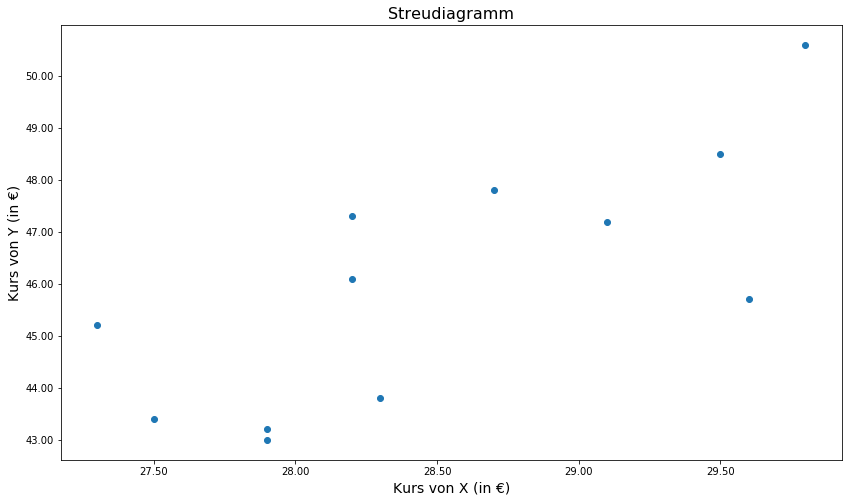

In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
%matplotlib inline

x_values = [27.9, 28.2, 27.5, 28.3, 28.2, 28.7, 27.9, 27.3, 29.1, 29.6, 29.5, 29.8]
y_values = [43, 46.1, 43.4, 43.8, 47.3, 47.8, 43.2, 45.2, 47.2, 45.7, 48.5, 50.6]

plt.figure(figsize=(14, 8))
plt.scatter(x=x_values, y=y_values)
plt.title('Streudiagramm', size=16)
plt.xlabel('Kurs von X (in €)', size=14)
plt.ylabel('Kurs von Y (in €)', size=14)

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))

plt.show()

toggle_code()